###  2.3 지도 학습 알고리즘

In [1]:
import mglearn
import matplotlib.pyplot as plt
#분류에 사용할 데이터셋 만들기
X, y = mglearn.datasets.make_forge()
#산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(['클래스 0','클래스 1'], loc=4)
plt.xlabel('1st feature')
plt.ylabel('2nd feature')
print('X.shape: {}'.format(X.shape))

X.shape: (26, 2)


Text(0,0.5,'target')

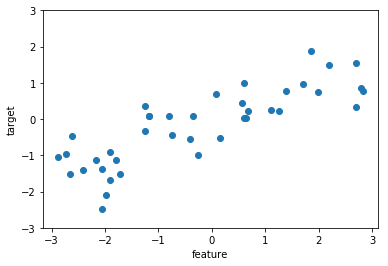

In [2]:
#회귀 알고리즘에 사용할 데이터셋
X, y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
#값의 범위 제한 -3 ~ 3
plt.ylim(-3,3)
plt.xlabel('feature')
plt.ylabel('target')

In [3]:
from sklearn.datasets import load_breast_cancer
import numpy as np
#유방암 종양 임상 데이터. 각 종양은 양성과 악성 종양으로 레이블 되어 있고, 조직 데이터를 기반으로 종양이 악성인지를 예측.
cancer = load_breast_cancer()
#key 확인
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
#데이터셋 차원 확인.
print('유방암 데이터의 형태 : {}'.format(cancer.data.shape))

유방암 데이터의 형태 : (569, 30)


In [5]:
print('클래스별 샘플 개수 : \n{}'.format(
        {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수 : 
{'malignant': 212, 'benign': 357}


In [6]:
#속성 확인해보기
print('특성 이름 : \n{}'.format(cancer.feature_names))

특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
from sklearn.datasets import load_boston
#또 다른 회귀 분석용 데이터셋으로 보스턴 주택가격 데이터셋을 사용. 범죄율, 찰스강 인접도, 고속도로 접근성 등의 
#정보를 이용해 1970년대 보스터 주변의 주택 평균 가격을 예측.
boston = load_boston()
print('데이터의 형태 : {}'.format(boston.data.shape))

데이터의 형태 : (506, 13)


In [8]:
#데이터셋 설명 살펴보기 
print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
#기존의 13개의 특성 말고도 특성끼리 곱하여 의도적으로 확장한 데이터셋을 고려해보도록 하자. 13개에서 2개씩 중복을 포함해 짝지은 91개의 특성을 더해
#총 104개의 특성을 가지고 있다.
X, y = mglearn.datasets.load_extended_boston()
print('X.shape : {}'.format(X.shape))

X.shape : (506, 104)


### 2.3.2 k-NN 

In [10]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [12]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
print('테스트 셋 예측 : {}'.format(clf.predict(X_test)))

테스트 셋 예측 : [1 0 1 0 1 0 0]


In [14]:
print('테스트 셋 정확도 : {:.2f}'.format(clf.score(X_test, y_test)))

테스트 셋 정확도 : 0.86


#### KneighborsClassifier 분석

2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려볼 수 있다.
그리고 각 데이터 포인트가 속한 클래스에 따라 평면에 색을 칠하면, 알고리즘이 클래스 0와 1로 지정한 영역으로 나뉘는
Decision boundary를 볼 수 있다.

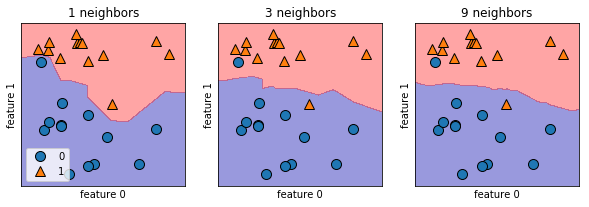

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)
#이웃을 적게 사용하면 모델이 복잡해지고, 이웃을 많게 사용하면 모델이 덜 복잡해진다.

모델의 복잡도와 일반화 사이의 관계를 살펴보기 위해 실제 데이터인 유방암 데이터셋을 사용해보자.

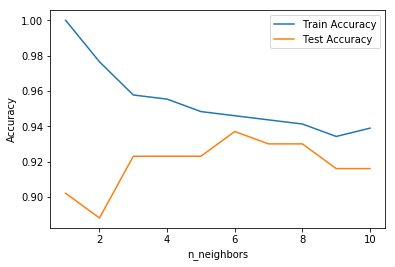

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='Train Accuracy')
plt.plot(neighbors_settings, test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
#이웃의 수가 적었을 때는 모델이 너무 복잡해 훈련 데이터셋에 과적합된 결과를 보여주었고,
#이웃의 수가 점차 늘어감에 따라 모델이 일반화된 결과를 보여주었다.
#하지만 계속 이웃의 수가 증가해 10개의 근처 이웃을 사용하는 경우 너무 단순화된 모델의 사용으로 인해 정확도가 낮아졌다.

#### k-NN Regression 

k-NN 알고리즘은 회귀 분석에도 쓰인다. 이번에는 wave 데이터셋을 이용해서 이웃이 1개인 1-NN을 사용해보자.

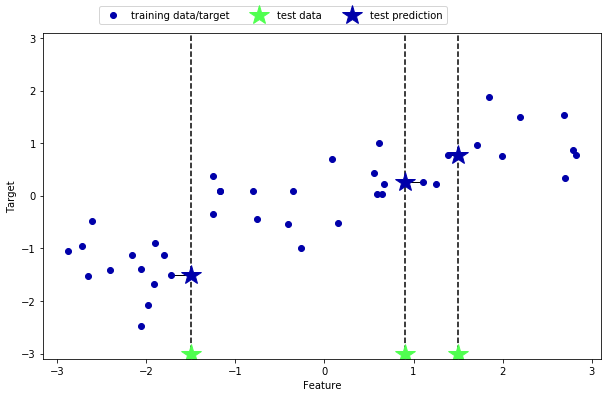

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

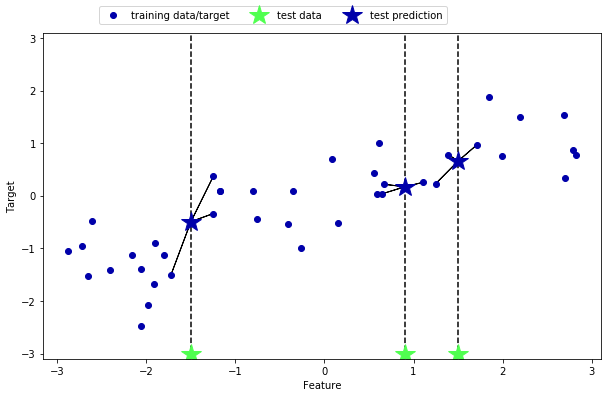

In [18]:
#이번엔 여러 개의 최근접 이웃을 사용해보자. 여러 개의 최근접 이웃을 사용하면 이웃 간의 평균을 예측한다.
#여기에서 weights 매개변수가 'uniform' 인 경우에는 np.mean의 단순 평균을 사용하고, 
#'distance'인 경우에는 거리를 고려한 가중치 평균을 사용한다.
mglearn.plots.plot_knn_regression(n_neighbors=3)

회귀를 위한 k-nn 알고리즘은 KNeighborsRegressor에 구현되어 있다. 사용법은 kNN Classifier와 비슷하다.

In [19]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)

reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [20]:
#score 메소드는 분류 일때는 정확도를 회귀 일때는 R^2갑을 반환한다. 결정 계수라고도 부른다.
#예측의 적합도를 0과 1사이의 값으로 계산한 것이다. 1은 예측이 완벽한 것, 0은 훈련 데이터의 출력값인 y_train의 평균으로만 예측하는 모델의 경우이다.
print('테스트 셋 예측 : \n{}'.format(reg.predict(X_test)))

테스트 셋 예측 : 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [21]:
#0.83이면 상당히 잘 들어맞은 결과
print('테스트 셋 R^2: {:2f}'.format(reg.score(X_test, y_test)))

테스트 셋 R^2: 0.834417


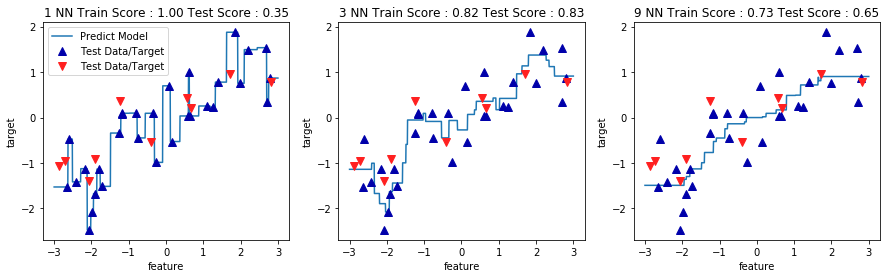

In [22]:
fig, axes = plt.subplots(1,3,figsize=(15,4))

line=np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train,y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test,y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} NN Train Score : {:.2f} Test Score : {:.2f}'.format(n_neighbors, reg.score(X_train,y_train), reg.score(X_test,y_test)))
    ax.set_xlabel('feature')
    ax.set_ylabel('target')
axes[0].legend(['Predict Model','Test Data/Target', 'Test Data/Target'], loc='best')
    

일반적으로 kNN 분류기의 중요한 매개변수는 두 개 이다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수 이다.
실제로 이웃의 수는 3개나 5개 정도로 적을 때 잘 작동하지만, 이 매개변수는 잘 조정해야한다.
또한 거리 재는 방식을 대부분 유클리디안거리 방식을 사용한다.

kNN의 장점은 이해하기 매우 쉬운 모델이고, 파라미터 튜닝이 많이 들어가지 않아도 좋은 성능을 발휘한다는 장점이 있다.
하지만 훈련 데이터 셋이 너무 크면 거리를 계산하는 연산이 많이 들어가므로 속도가 느려진다. 따라서 kNN 알고리즘을 사용할 때는
데이터의 전처리가 매우 중요하다. 그리고 수백 개 이상의 많은 feature를 가지고 있는 경우에는 잘 작동하지 않는다. 또한 희소 데이터에 대해서도
잘 작동하지 않음.

### 2.3.3 선형 모델 

 선형 모델은 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다. 간단히 y = a0 + a1*x 형태의 수식 선형 모델에서 특성이 하나일 땐 직선, 두 개 일 땐 평면이 되며, 더 높은 차원에서는 초평면이 되는 회귀 모델의 특징을 가지고 있다.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


w[0]: 0.393906  b: -0.031804


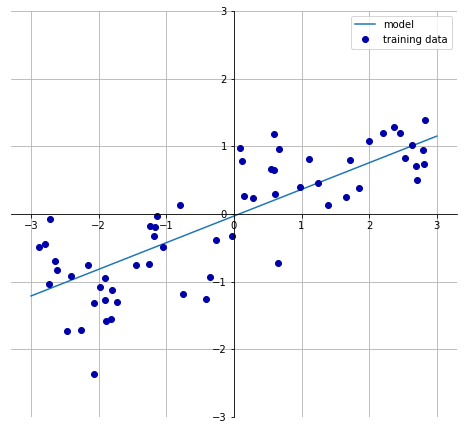

In [23]:
mglearn.plots.plot_linear_regression_wave()

#### 선형 회귀 (최소 제곱법)

선형 회귀 또는 최소제곱법은 가장 간단하고 오래된 회귀용 선형 알고리즘이다. 선형 회귀는 예측과 훈련 셋에 있는 타겟 y사이의 평균제곱오차를 최소화하는 파라미터  a1과 a0를 찾습니다. 평균제곱오차는 예측값과 타겟값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것이다. 선형 회귀는 매개변수가 없는 것이 장점도 있고, 모델의 복잡도를 제어할 수 없다는 단점도 있다.

In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)
#선형 회귀에서 기울기 파라미터 a1는 가중치 또는 계수 라고도 한다. lr 모델의 coef_ 속성에 저장되어 있다. 
#편항 또는 절편이라 부르는 파라미터 a0는 intercept_ 속성에 저장되어 있음.
#절편은 1개지만 가중치는 feature당 1개 이므로 여러개 있을 수 있다.

In [26]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746
